In [122]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = ('testsets/regular/01.png')
# img = cv2.imread(path, cv2.IMREAD_UNCHANGED)  # BGR or G
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # RGB

# print(img.shape)

# img = img[:,:,:2]
# print(img.shape)

In [123]:
def imread_uint(path, n_channels=3):
    #  input: path
    # output: HxWx3(RGB or GGG), or HxWx1 (G)
    if n_channels == 1:
        img = cv2.imread(path, 0)  # cv2.IMREAD_GRAYSCALE
        img = np.expand_dims(img, axis=2)  # HxWx1
    elif n_channels == 2:
        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)  # BGR or G
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # RGB

        # cut off B channel to only keep 2 channels
        img = img[:,:,:2]
    elif n_channels == 3:
        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)  # BGR or G
        if img.ndim == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # GGG
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # RGB
    return img

def fill_in(img, n_channels=3):
    init_channels = cv2.split(img)
    channels = np.array([channel for channel in init_channels])
    for i in range(n_channels - len(channels)):
        _ = np.zeros(init_channels[0].shape, dtype='uint8')
        channels = np.append(channels, [_], axis = 0)
    merged = cv2.merge(tuple(channels))
    return merged

In [124]:
im_3 = imread_uint(path, n_channels=3)
im_2 = imread_uint(path, n_channels=2)

In [125]:
im_2_filled = fill_in(im_2)

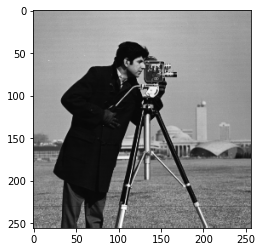

In [126]:
plt.imshow(im_3)

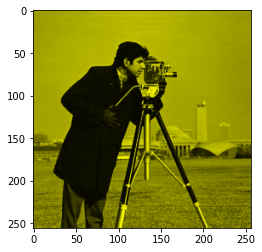

In [127]:
plt.imshow(im_2_filled)